### DFT de um coseno

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

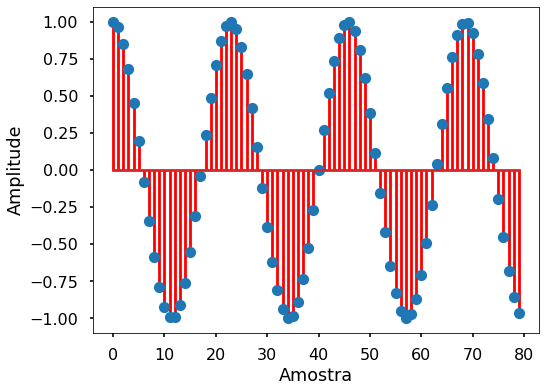

In [25]:
# sampling rate
Fs = 8000
N = 80 # numero de amostras
# sampling interval
#ts = 1.0/Fs
n = np.arange(N)

freq = 350.
x = 1*np.cos(2*np.pi*freq*n/Fs)

plt.figure(figsize = (8, 6))
plt.stem(n, x, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Amostra')

#plt.xlim(0, .01)
plt.show()

In [26]:
 ## Definindo a DFT
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X


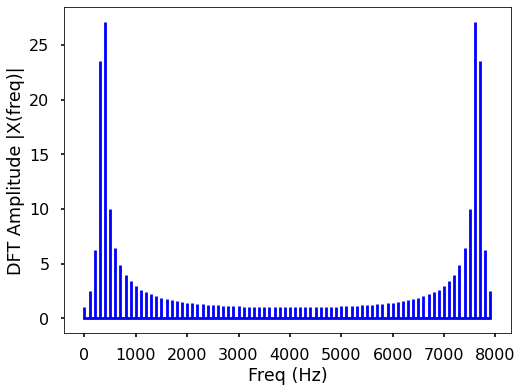

In [27]:
## Calculando a DFT com a funcao
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/Fs
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

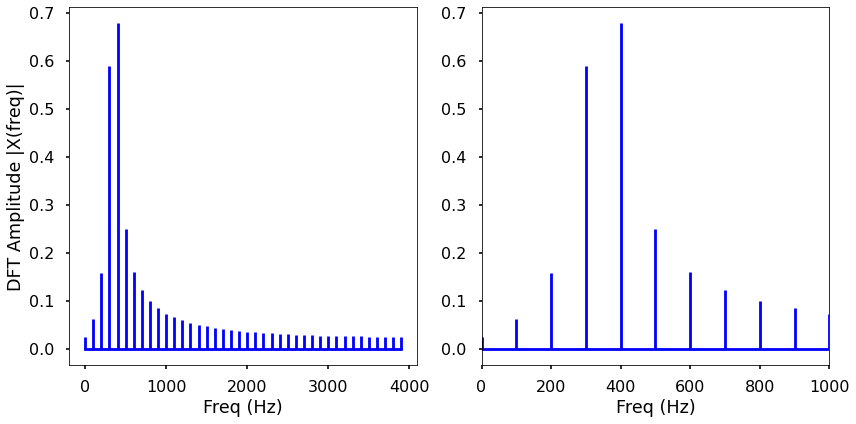

In [28]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()

In [6]:
## Usando a FFT
import numpy as np
from numpy import pi, cos, log10
from numpy.fft import fft
import matplotlib.pyplot as plt

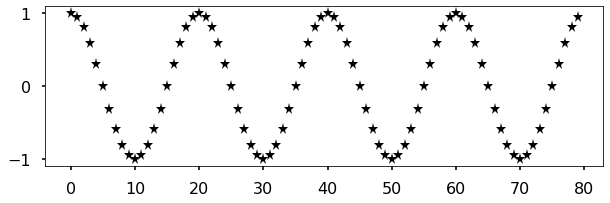

In [9]:
X = fft(x)          # Spectrum

plt.figure(figsize=(10,10))

# Plot time data:
plt.subplot(3,1,1)
plt.plot(n,x,'*k')        



Text(0, 0.5, 'Magnitude (Linear)')

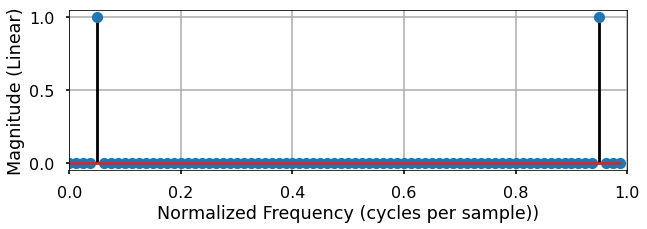

In [10]:
# Plot spectral magnitude:
N = 80

magX = abs(X)
fn = np.arange(0, 1, 1/N)  # Normalized frequency axis
plt.figure(figsize = (10, 10))
plt.subplot(3,1,2)
plt.stem(fn,2*magX/N,'-ok', use_line_collection=True)
plt.grid()
plt.xlim(0,1)
plt.xlabel('Normalized Frequency (cycles per sample))') 
plt.ylabel('Magnitude (Linear)')
#plt.text(-.11,30,'b)')

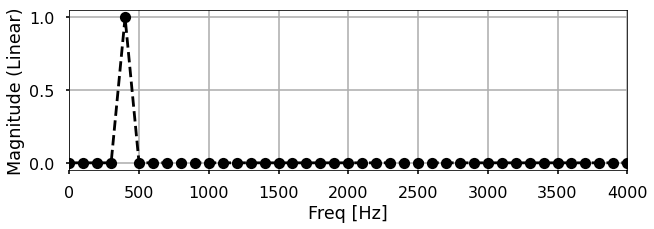

In [11]:
# Same thing on a dB scale:
#spec = 20*log10(magX) # Spectral magnitude in dB
f_hz = fn * Fs
plt.figure(figsize = (10, 10))
plt.subplot(3,1,3)
plt.plot(f_hz,2*magX/N,'--ok')
#plt.plot(f_hz,spec,'--ok')
plt.grid()
plt.xlim(0,Fs/2)
#plt.ylim(-100, 20)
plt.xlabel('Freq [Hz]') 
plt.ylabel('Magnitude (Linear)')
#plt.text(-.11,0,'c)')

plt.show()